# 0. Import all libraries

In [68]:
import os

import pandas as pd
import numpy as np
from scipy.stats import normaltest,shapiro
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Here, we have loaded 2 types of Libraries

a) Inbuilt Library


b) Third-Party Library

# 1. Data Collection

According to client inputs, our domain experts and data analysts team created the dataset in.CSV format.

In [69]:
df= pd.read_csv('data/Cars_data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Load the dataset files with csv extension from the dataset folder.

In [70]:
print('No. of Rows: ',df.shape[0])
print('No. of Columns: ',df.shape[1])

No. of Rows:  11914
No. of Columns:  16



# 2. Dataset Information.<br>

 `Make:` The Make feature is the brand name of the Car.<br>
`Model:` The Model feature is the brand of model or different version of Car models.<br>
`Year:`  The year describes the year of launched.<br>
`Engine Fuel Type:` It defines the Fuel type of the car model.<br>
`Engine HP:` Engine HP means Horsepower that refers to the power an engine produces.<br>
`Engine Cylinders:` Engine Cylinders are number of cylinders in present in the engine.<br>
`Transmission Type:` It is the type of feature that describe about the car transmission type i.e Mannual or automatic.<br>
`Driven_Wheels:` The type of wheel drive.<br>
`No of doors:` It defined nos of doors present in the car.<br>
`Market Category:` This features tells about the type of car or which category the car belongs. <br>
`Vehicle Size:` It's say about the about car size.<br>
`Vehicle Style:` The feature is all about the style that belongs to car.<br>
`highway MPG:` The average a car will get while driving on an open stretch of road without stopping or starting, typically at a higher speed.<br>
`city mpg:` City MPG refers to driving with occasional stopping and braking.<br>
`Popularity:` It can refered to rating of that car or popularity of car.<br>
`MSRP:` The price of that car.

# 3. Data checks to perform

•	Check for missing values.

•	Check for duplicates.

•	Check the data type.

•	Check the number of unique values in each column.

•	Check the statistics of the dataset.

•	Check the various categories present in the different categorical categories.

## 3.0 Check Data types

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

df.info() >> This gives us information about the attributes, data type of the attribute, information about the null values of the attributes, memory size of the class which is 1.5+ MB.

In [72]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

Our objective is to transform every category feature (Object) into a numerical feature (int).

## 3.1 Check Null Values

Here, We will try to find out the Explicit and Implicit Missing values in our Dataset.

In [73]:
df.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

Missing Value Ratio Method

In [110]:
missing_val = (df.isna().sum())/df.shape[0] * 100
missing_val.sort_values(ascending = False)

Market Category      30.145549
Engine HP             0.616126
Engine Cylinders      0.267881
Number of Doors       0.053576
Engine Fuel Type      0.026788
Make                  0.000000
Model                 0.000000
Year                  0.000000
Transmission Type     0.000000
Driven_Wheels         0.000000
Vehicle Size          0.000000
Vehicle Style         0.000000
highway MPG           0.000000
city mpg              0.000000
Popularity            0.000000
MSRP                  0.000000
dtype: float64

<Axes: >

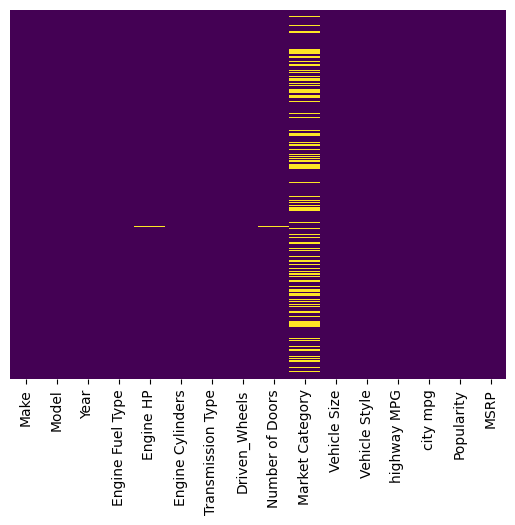

In [112]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Multiple columns contain multiple missing values.

## 3.2 Check Duplicates

In [74]:
df.duplicated().sum()

715

There are 715 duplicates values in the dataset. We will remove all the duplicates values from the dataset.

In [75]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

There are no duplicates values in the dataset. 

## 3.3 Checking the number of unique values in each column.

In [76]:
df.nunique()

Make                   48
Model                 915
Year                   28
Engine Fuel Type       10
Engine HP             356
Engine Cylinders        9
Transmission Type       5
Driven_Wheels           4
Number of Doors         3
Market Category        71
Vehicle Size            3
Vehicle Style          16
highway MPG            59
city mpg               69
Popularity             48
MSRP                 6049
dtype: int64

## 3.4 Check Statistics of the dataset

In [77]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11199.000000,11130.000000,11169.000000,11193.000000,11199.000000,11199.000000,11199.000000,1.119900e+04
mean,2010.714528,253.388859,5.665950,3.454123,26.610590,19.731851,1558.483347,4.192593e+04
std,7.228211,110.150938,1.797021,0.872946,8.977641,9.177555,1445.668872,6.153505e+04
min,1990.000000,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,172.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.159950e+04
50%,2015.000000,239.000000,6.000000,4.000000,25.000000,18.000000,1385.000000,3.067500e+04
75%,2016.000000,303.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.303250e+04
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


`Insights:` 


From the above description of numerical data, all means are not close to each other.
All standard deviations are also not close to each other.

•	Means (year) = (2010) and max (year) = (2017). This is acceptable.

•	Means (engine cylinders) = 5.6, and max (engine cylinders) = 16.. This is acceptable.

•	Means (number of doors) = (3.4) and max (engine cylinders) = (4). This is acceptable.

•	Mean (engine) = (253) and max (year) = (1001). This is not acceptable. It indicates that this feature might have some outliers.

•	Means (Highway MPG) = (26.6) and max (Highway MPG) = (354). This is not acceptable. It indicates that this feature might have some outliers.

•	Means (city MPG) = (19.7) and max (city MPG) = (137). This is not acceptable. It indicates that this feature might have some outliers.

## 3.5 Explore Data

In [78]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 8 numerical features : ['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']

We have 8 categorical features : ['Make', 'Model', 'Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style']


In [79]:
for column in list(df.select_dtypes(include='object')):
  print(column, ': ', df[column].unique())
  print('\n','*'*110)

Make :  ['BMW' 'Audi' 'FIAT' 'Mercedes-Benz' 'Chrysler' 'Nissan' 'Volvo' 'Mazda'
 'Mitsubishi' 'Ferrari' 'Alfa Romeo' 'Toyota' 'McLaren' 'Maybach'
 'Pontiac' 'Porsche' 'Saab' 'GMC' 'Hyundai' 'Plymouth' 'Honda'
 'Oldsmobile' 'Suzuki' 'Ford' 'Cadillac' 'Kia' 'Bentley' 'Chevrolet'
 'Dodge' 'Lamborghini' 'Lincoln' 'Subaru' 'Volkswagen' 'Spyker' 'Buick'
 'Acura' 'Rolls-Royce' 'Maserati' 'Lexus' 'Aston Martin' 'Land Rover'
 'Lotus' 'Infiniti' 'Scion' 'Genesis' 'HUMMER' 'Tesla' 'Bugatti']

 **************************************************************************************************************
Model :  ['1 Series M' '1 Series' '100' '124 Spider' '190-Class' '2 Series' '200'
 '200SX' '240SX' '240' '2' '3 Series Gran Turismo' '3 Series' '300-Class'
 '3000GT' '300' '300M' '300ZX' '323' '350-Class' '350Z' '360' '370Z' '3'
 '4 Series Gran Coupe' '4 Series' '400-Class' '420-Class' '456M'
 '458 Italia' '4C' '4Runner' '5 Series Gran Turismo' '5 Series'
 '500-Class' '500e' '500' '500L' '500X' '5

In [80]:
for column in list(df.select_dtypes(include='int')):
  print(column, ': ', df[column].unique())
  print('\n','*'*112)

Year :  [2011 2012 2013 1992 1993 1994 2017 1991 2016 1990 2015 1996 1997 1998
 2014 1999 2002 2003 2004 1995 2007 2008 2009 2001 2010 2000 2005 2006]

 ****************************************************************************************************************
highway MPG :  [ 26  28  27  25  24  20  21  22  35  34  31  30  32  33  23  36  29  45
  43  40  42  19  18  17  15  37  39  41  16  14  38 108 103  12 354  47
  46  82 110  44  13 105  99 102 111 106  48 101  90  97  94  98 100 107
  53  50  74  92 109]

 ****************************************************************************************************************
city mpg :  [ 19  20  18  17  16  26  23  22  21  24  15  25  29  28  32  31  30  14
  10  27  12  13   9  11 122 121   8  50  49  47  35  33  40  85 128  42
  43  36  44 126   7  34 132 110 137 129  39  41 124  37  88  94  86 101
  95  89 102  98  92  97  91  53  55  51  54  58  78  38 120]

 ********************************************************************

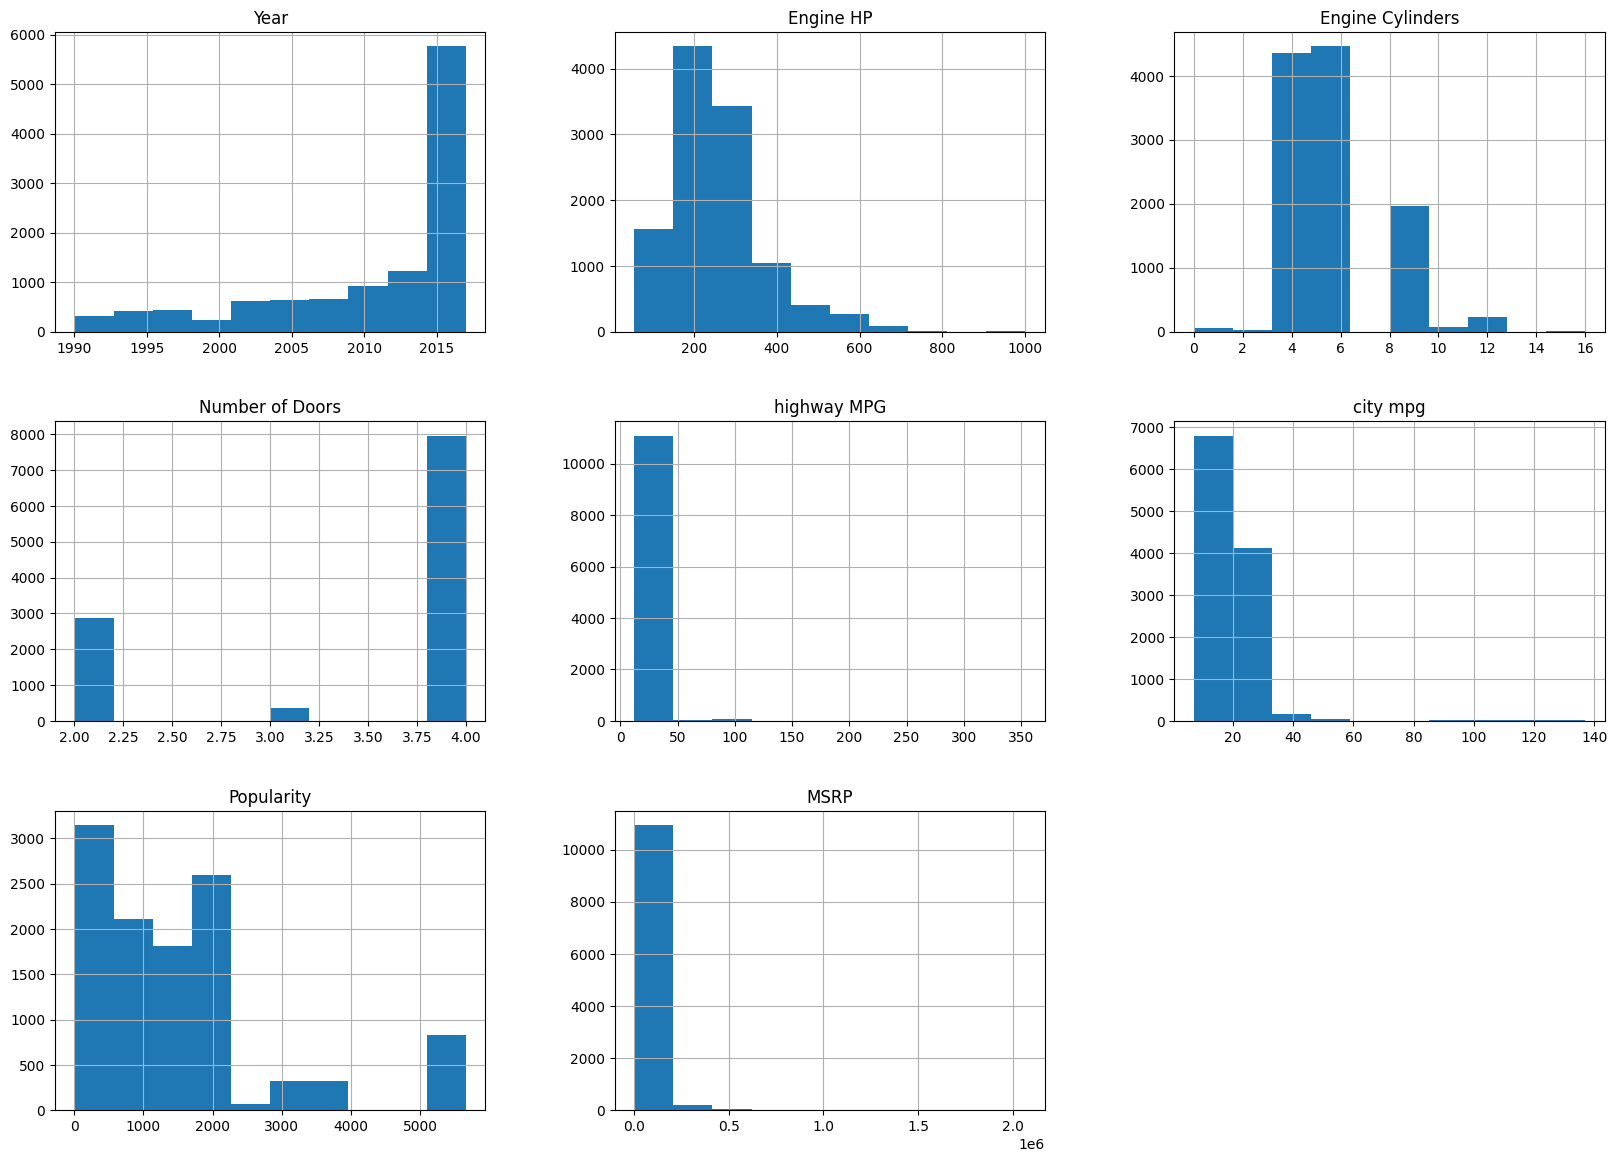

In [81]:
df.hist(figsize=(20,14))
plt.show()

Normal & Shapiro Test

In [82]:
for feature in numeric_features:
    status,p_val = normaltest(df[feature])
    print(f'p value[{feature}] :', p_val)
    if p_val.all() > 0.05:
        print('Null hypothesis >> {} data is Normally Distributed.'.format(feature))
    else:
        print('Alternate Hypothesis >> {} data is not Normally distributed.'.format(feature))
    print('*'*100)

p value[Year] : 0.0
Alternate Hypothesis >> Year data is not Normally distributed.
****************************************************************************************************
p value[Engine HP] : nan
Null hypothesis >> Engine HP data is Normally Distributed.
****************************************************************************************************
p value[Engine Cylinders] : nan
Null hypothesis >> Engine Cylinders data is Normally Distributed.
****************************************************************************************************
p value[Number of Doors] : nan
Null hypothesis >> Number of Doors data is Normally Distributed.
****************************************************************************************************
p value[highway MPG] : 0.0
Alternate Hypothesis >> highway MPG data is not Normally distributed.
****************************************************************************************************
p value[city mpg] : 0.0
Alternate Hyp

Z-Score Test

In [43]:
normally_distributed_features = ['Engine HP', 'Engine Cylinders', 'Number of Doors']

for feature in normally_distributed_features:
    mean = df[feature].mean()
    std = df[feature].std()
    print('mean({}): '.format(feature), mean)
    print('standard distribution({}): '.format(feature), std)

    threshold = 3
    outliers = []
    for val in df[feature]:
        z_score = (val - mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(val)
    print('Detected Outliers of {} are: '.format(feature), outliers) 
    print('*'*100)

mean(Engine HP):  253.38885893980233
standard distribution(Engine HP):  110.15093795679645
Detected Outliers of Engine HP are:  [597.0, 597.0, 631.0, 604.0, 620.0, 620.0, 611.0, 611.0, 611.0, 611.0, 661.0, 604.0, 631.0, 620.0, 620.0, 641.0, 641.0, 600.0, 600.0, 600.0, 700.0, 700.0, 720.0, 720.0, 700.0, 700.0, 720.0, 720.0, 700.0, 750.0, 750.0, 700.0, 650.0, 650.0, 605.0, 605.0, 707.0, 707.0, 707.0, 707.0, 707.0, 707.0, 621.0, 621.0, 621.0, 600.0, 600.0, 600.0, 626.0, 600.0, 616.0, 626.0, 626.0, 626.0, 626.0, 600.0, 600.0, 621.0, 621.0, 621.0, 621.0, 621.0, 650.0, 650.0, 650.0, 650.0, 650.0, 650.0, 650.0, 650.0, 650.0, 650.0, 650.0, 650.0, 650.0, 650.0, 650.0, 650.0, 650.0, 650.0, 640.0, 640.0, 660.0, 731.0, 731.0, 731.0, 651.0, 651.0, 651.0, 616.0, 616.0, 616.0, 621.0, 600.0, 600.0, 610.0, 610.0, 610.0, 620.0, 620.0, 592.0, 616.0, 632.0, 632.0, 632.0, 632.0, 631.0, 631.0, 631.0, 631.0, 670.0, 610.0, 650.0, 621.0, 621.0, 621.0, 621.0, 621.0, 621.0, 605.0, 605.0, 662.0, 662.0, 662.0, 662

### Feature Selection

Correlation Method

In [101]:
correlation = df[['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors',
                   'highway MPG',  'city mpg',  'Popularity', 'MSRP']].corr(method='pearson')
correlation

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
Year,1.000000,0.336208,-0.034148,0.247574,0.244972,0.188417,0.085874,0.209635
Engine HP,0.336208,1.000000,0.788433,-0.129278,-0.415452,-0.446855,0.042499,0.659174
Engine Cylinders,-0.034148,0.788433,1.000000,-0.149877,-0.617420,-0.598708,0.038640,0.538712
Number of Doors,0.247574,-0.129278,-0.149877,1.000000,0.114673,0.120682,-0.057235,-0.144925
highway MPG,0.244972,-0.415452,-0.617420,0.114673,1.000000,0.886299,-0.017159,-0.166631
city mpg,0.188417,-0.446855,-0.598708,0.120682,0.886299,1.000000,-0.000549,-0.162343
Popularity,0.085874,0.042499,0.038640,-0.057235,-0.017159,-0.000549,1.000000,-0.048371
MSRP,0.209635,0.659174,0.538712,-0.144925,-0.166631,-0.162343,-0.048371,1.000000


Correlation Heatmap

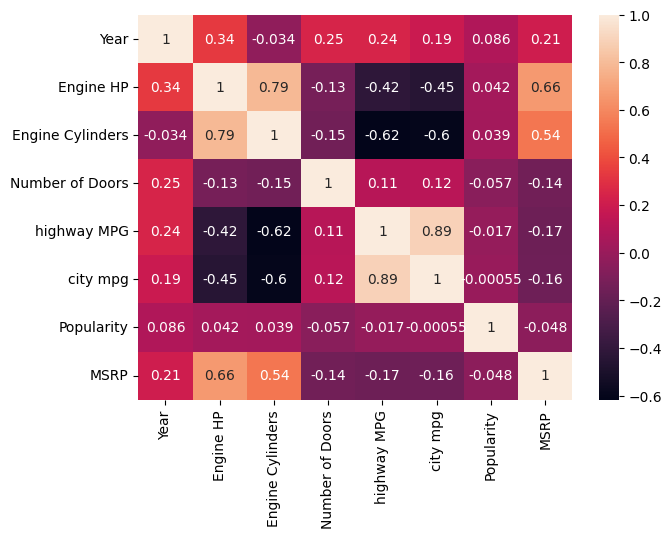

In [108]:
correlations = correlation.abs()
plt.figure(figsize=(7,5))
sns.heatmap(correlation, annot=True)
plt.show()